In [92]:
import re
import os
import pathlib
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import gridspec
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme(style="darkgrid")

# Root of the project
project_dir = pathlib.Path().resolve().parent

# Directory containing experiment results
results_dir = (pathlib.Path(project_dir) / "results").resolve()

# Directory for tidied data (output directory)
data_dir = (pathlib.Path(project_dir) / "data").resolve()

# Directory to store all plots
plot_dir = (pathlib.Path(project_dir) / "plots").resolve()

In [93]:
# Load microbench 01 (node count results)

with open(results_dir / "micro-bench/01_workload/1-node_new.json") as f:
    one_node = json.load(f)

with open(results_dir / "micro-bench/01_workload/2-node_new.json") as f:
    two_node = json.load(f)


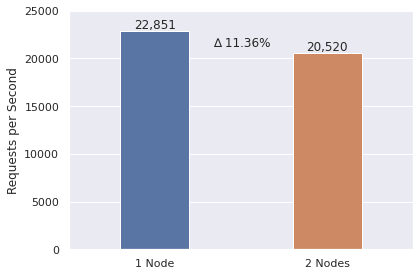

In [96]:
"""Checking the impact on throughput when changing the node count"""

# data
x = ["1 Node", "2 Nodes"]
y =  [one_node["ActualQPS"], two_node["ActualQPS"]]

fig, ax = plt.subplots()

ax = sns.barplot(x=x, y=y, ax=ax)

ax.set_ylim(0, 25000)

# Show numbers on top of bars
container = ax.containers[0]
ax.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])
# ax.bar_label(ax.containers[0], fmt="%.0f")

w = 0.4
for bar in ax.patches:
    x = bar.get_x()
    width = bar.get_width()
    centre = x + width/2.

    bar.set_x(centre - w / 2.)
    bar.set_width(w)

ax.set_ylabel("Requests per Second")
# ax.set_title("Average Requests per Second vs. Node Count")


ax.annotate(
    text="∆ 11.36%",
    size=12,
    # weight="bold",
    xycoords="axes fraction",
    # textcoords="axes fraction",
    xy=(0.42, 0.85),
    # xytext=(0.45, 0.8),
    # arrowprops=dict(arrowstyle="<|-|>", facecolor="black"),
    # arrowprops=dict(arrowstyle="<->", color="black"),
    # horizontalalignment='right', verticalalignment='top',
)


fig.tight_layout()
fig.savefig(plot_dir / "microbench-node-count.pdf")


In [95]:
np.diff(container.datavalues)

array([-2331.24893806])